In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv('/content/income (1).csv')
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

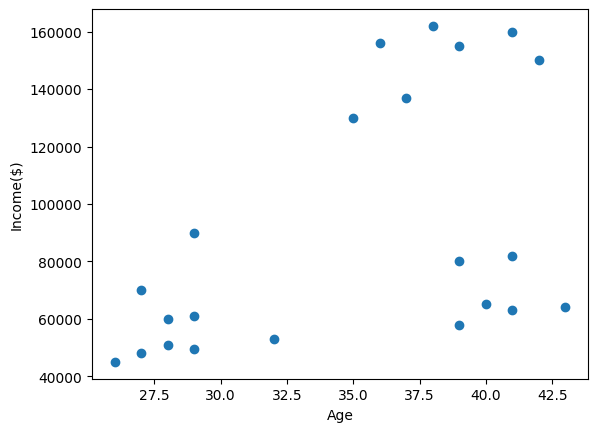

In [4]:
plt.scatter(data.Age,data['Income($)'])
plt.xlabel('Age')
plt.ylabel  ('Income($)')

In [5]:
km=KMeans(n_clusters=3)
y_predict=km.fit_predict(data[['Age','Income($)']])
y_predict

array([0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [6]:
data['cluster']=y_predict
data.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,0
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [7]:
km.cluster_centers_

array([[3.24166667e+01, 5.72916667e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.63333333e+01, 8.40000000e+04]])

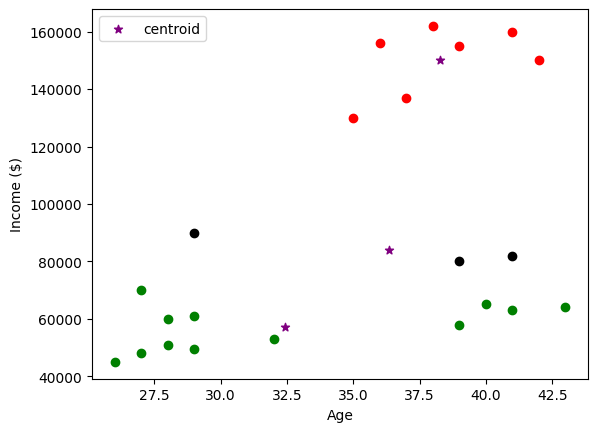

In [8]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [9]:
scaler=MinMaxScaler()
data[['Income($)']]=scaler.fit_transform(data[['Income($)']])
scaler2=MinMaxScaler()
data[['Age']]=scaler2.fit_transform(data[['Age']])

In [10]:
data.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


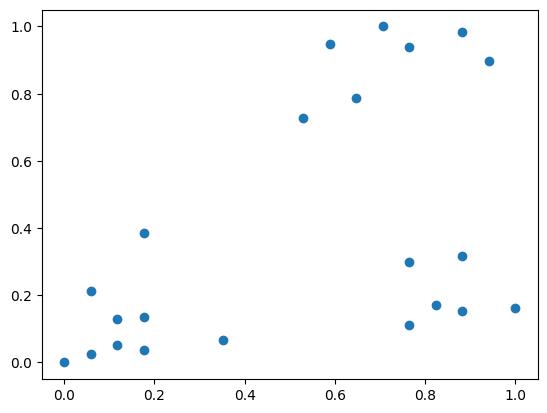

In [11]:
plt.scatter(data.Age,data[['Income($)']])

In [12]:
km=KMeans(n_clusters=3)
y_predict=km.fit_predict(data[['Age','Income($)']])
y_predict

array([2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [13]:
data['culster']=y_predict
data.head()

,Name,Age,Income($),cluster,culster
0,Rob,0.058824,0.213675,0,2
1,Michael,0.176471,0.384615,2,2
2,Mohan,0.176471,0.136752,0,2
3,Ismail,0.117647,0.128205,0,2
4,Kory,0.941176,0.897436,1,1


In [14]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

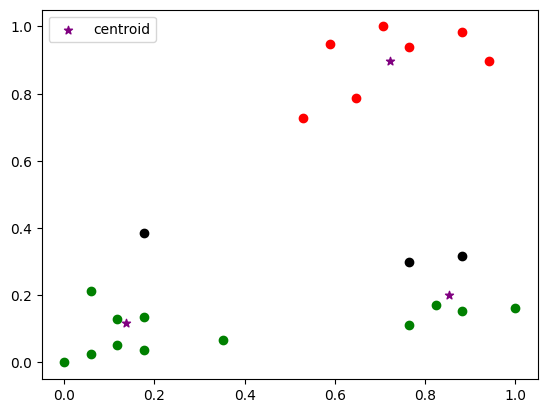

In [15]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()


In [16]:
array=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit_predict(data[['Age','Income($)']])
    array.append(km.inertia_)

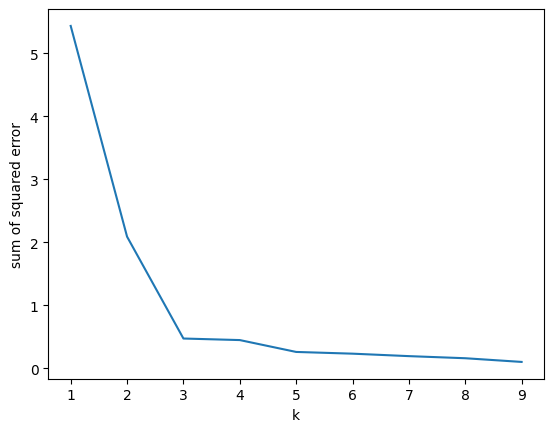

In [17]:
plt.xlabel('k')
plt.ylabel('sum of squared error')
plt.plot(k_rng,array)